In [1]:
#install.packages("rlang")
#install.packages("caret")
#install.packages("dplyr")
#install.packages("gbm")
#install.packages("caret")
#install.packages("ggplot2")
#install.packages('pROC')

In [2]:
# Load libraries
library(dplyr)
library(caret)
library(readr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: ggplot2

Loading required package: lattice



In [3]:
# Load the dataset 'customer_churn'
Electric_vehicles <- read.csv("EV Vehicles.csv")

### DATA DESCRIPTION

In [4]:
# Display the first few rows of the dataset
head(Electric_vehicles)

,VIN..1.10.,County,City,State,Postal.Code,Model.Year,Make,Model,Electric.Vehicle.Type,Clean.Alternative.Fuel.Vehicle.Eligibility,Electric.Range,Base.MSRP,Legislative.District,DOL.Vehicle.ID,Vehicle.Location,Electric.Utility,X2020.Census.Tract
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>
1,5YJYGDEE1L,King,Seattle,WA,98122,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033007800
2,7SAYGDEE9P,Snohomish,Bothell,WA,98021,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not been researched,0,0,1,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,53061051938
3,5YJSA1E4XK,King,Seattle,WA,98109,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033006800
4,5YJSA1E27G,King,Issaquah,WA,98027,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033032104
5,5YJYGDEE5M,Kitsap,Suquamish,WA,98392,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not been researched,0,0,23,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,53035940100
6,3FA6P0SU8H,Thurston,Yelm,WA,98597,2017,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0,2,122057736,POINT (-122.61023 46.94126),PUGET SOUND ENERGY INC,53067012532


In [5]:
# Display the last few rows of the dataset
tail(Electric_vehicles)

,VIN..1.10.,County,City,State,Postal.Code,Model.Year,Make,Model,Electric.Vehicle.Type,Clean.Alternative.Fuel.Vehicle.Eligibility,Electric.Range,Base.MSRP,Legislative.District,DOL.Vehicle.ID,Vehicle.Location,Electric.Utility,X2020.Census.Tract
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>
177861,1G1FX6S00J,Clallam,Sequim,WA,98382,2018,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,24,347972607,POINT (-123.105015 48.08125),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLALLAM COUNTY,53009001800
177862,7SAYGDEE3N,Pierce,Bonney Lake,WA,98391,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not been researched,0,0,31,195224452,POINT (-122.183805 47.18062),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53053070308
177863,KM8K23AG1P,Mason,Shelton,WA,98584,2023,HYUNDAI,KONA ELECTRIC,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not been researched,0,0,35,228454180,POINT (-123.105305 47.211085),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PUD NO 3 OF MASON COUNTY,53045960900
177864,5YJYGDEE6M,Grant,Quincy,WA,98848,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not been researched,0,0,13,168797219,POINT (-119.8493873 47.2339933),PUD NO 2 OF GRANT COUNTY,53025010500
177865,WVGKMPE27M,King,Black Diamond,WA,98010,2021,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not been researched,0,0,5,182448801,POINT (-122.00451 47.312185),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033031603
177866,5YJ3E1EA8M,Pierce,Tacoma,WA,98422,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not been researched,0,0,27,211464683,POINT (-122.38578 47.28971),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY,53053940005


In [6]:
#Display the structure of the dataset
str(Electric_vehicles)

'data.frame':	177866 obs. of  17 variables:
 $ VIN..1.10.                                : chr  "5YJYGDEE1L" "7SAYGDEE9P" "5YJSA1E4XK" "5YJSA1E27G" ...
 $ County                                    : chr  "King" "Snohomish" "King" "King" ...
 $ City                                      : chr  "Seattle" "Bothell" "Seattle" "Issaquah" ...
 $ State                                     : chr  "WA" "WA" "WA" "WA" ...
 $ Postal.Code                               : int  98122 98021 98109 98027 98392 98597 98903 98012 98366 98001 ...
 $ Model.Year                                : int  2020 2023 2019 2016 2021 2017 2013 2018 2015 2022 ...
 $ Make                                      : chr  "TESLA" "TESLA" "TESLA" "TESLA" ...
 $ Model                                     : chr  "MODEL Y" "MODEL Y" "MODEL S" "MODEL S" ...
 $ Electric.Vehicle.Type                     : chr  "Battery Electric Vehicle (BEV)" "Battery Electric Vehicle (BEV)" "Battery Electric Vehicle (BEV)" "Battery Electric Vehicle (BE

In [7]:
#Check for the number of rows
nrow(Electric_vehicles)

[1] 177866

In [8]:
#Check for the number of columns
ncol(Electric_vehicles)

[1] 17

In [9]:
#Check for the names of columns
names(Electric_vehicles)

[1] "VIN..1.10."                                
 [2] "County"                                    
 [3] "City"                                      
 [4] "State"                                     
 [5] "Postal.Code"                               
 [6] "Model.Year"                                
 [7] "Make"                                      
 [8] "Model"                                     
 [9] "Electric.Vehicle.Type"                     
[10] "Clean.Alternative.Fuel.Vehicle.Eligibility"
[11] "Electric.Range"                            
[12] "Base.MSRP"                                 
[13] "Legislative.District"                      
[14] "DOL.Vehicle.ID"                            
[15] "Vehicle.Location"                          
[16] "Electric.Utility"                          
[17] "X2020.Census.Tract"

In [10]:
# Display descriptive statistics
summary(Electric_vehicles)

  VIN..1.10.           County              City              State          
 Length:177866      Length:177866      Length:177866      Length:177866     
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
  Postal.Code      Model.Year       Make              Model          
 Min.   : 1545   Min.   :1997   Length:177866      Length:177866     
 1st Qu.:98052   1st Qu.:2019   Class :character   Class :character  
 Median :98122   Median :2022   Mode  :character   Mode  :character  
 Mean   :98172   Mean   :2021                                        
 3rd Qu.:98370   3rd Qu.:2023     

### DATA PRE-PROCESSING

In [11]:
#Check for total number of missing values
sum(colSums(is.na(Electric_vehicles)))

[1] 399

In [12]:
# Remove rows with any missing values
Electric_vehicles_clean <- na.omit(Electric_vehicles)


In [13]:
#Check for total number of missing values
sum(colSums(is.na(Electric_vehicles_clean)))

[1] 0

In [14]:
# Encoding using 'factor' function
Electric_vehicles_clean$County <- as.numeric(factor(Electric_vehicles_clean$County))
Electric_vehicles_clean$City <- as.numeric(factor(Electric_vehicles_clean$City))
Electric_vehicles_clean$Make <- as.numeric(factor(Electric_vehicles_clean$Make))
Electric_vehicles_clean$Clean.Alternative.Fuel.Vehicle.Eligibility <- as.numeric(factor(Electric_vehicles_clean$Clean.Alternative.Fuel.Vehicle.Eligibility))
Electric_vehicles_clean$Model <- as.numeric(factor(Electric_vehicles_clean$Model))
Electric_vehicles_clean$Electric.Utility <- as.numeric(factor(Electric_vehicles_clean$Electric.Utility))
Electric_vehicles_clean$Electric.Vehicle.Type <- as.numeric(factor(Electric_vehicles_clean$Electric.Vehicle.Type))

In [15]:
# Assuming Electric.Vehicle.Type is a factor with two levels already
#Electric_vehicles_clean$Electric.Vehicle.Type <- as.numeric(factor(Electric_vehicles_clean$Electric.Vehicle.Type, levels = c(0, 1)))


In [16]:
head(Electric_vehicles_clean)

,VIN..1.10.,County,City,State,Postal.Code,Model.Year,Make,Model,Electric.Vehicle.Type,Clean.Alternative.Fuel.Vehicle.Eligibility,Electric.Range,Base.MSRP,Legislative.District,DOL.Vehicle.ID,Vehicle.Location,Electric.Utility,X2020.Census.Tract
,<chr>,<dbl>,<dbl>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>
1,5YJYGDEE1L,17,363,WA,98122,2020,35,82,1,1,291,0,37,125701579,POINT (-122.30839 47.610365),58,53033007800
2,7SAYGDEE9P,31,37,WA,98021,2023,35,82,1,2,0,0,1,244285107,POINT (-122.179458 47.802589),73,53061051938
3,5YJSA1E4XK,17,363,WA,98109,2019,35,80,1,1,270,0,36,156773144,POINT (-122.34848 47.632405),58,53033006800
4,5YJSA1E27G,17,181,WA,98027,2016,35,80,1,1,210,0,5,165103011,POINT (-122.03646 47.534065),74,53033032104
5,5YJYGDEE5M,18,405,WA,98392,2021,35,82,1,2,0,0,23,205138552,POINT (-122.55717 47.733415),73,53035940100
6,3FA6P0SU8H,34,467,WA,98597,2017,12,52,2,3,21,0,2,122057736,POINT (-122.61023 46.94126),73,53067012532


In [17]:
Electric_vehicles_summary<-table(Electric_vehicles_clean$Electric.Vehicle.Type)
Electric_vehicles_summary


     1      2 
138948  38529 


     1      2 
138948  38529 

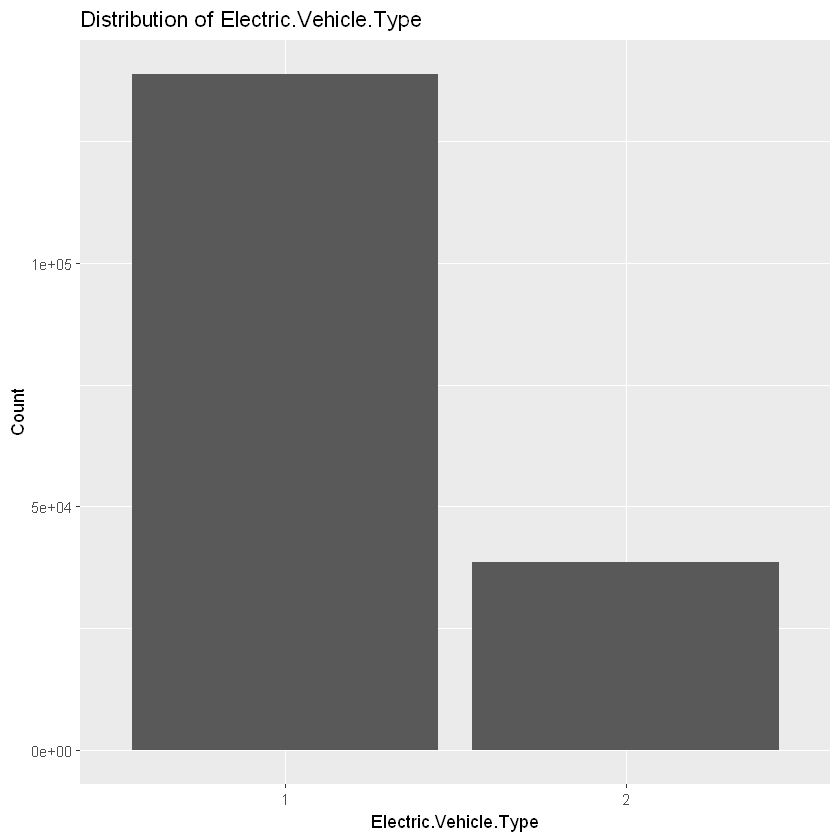

In [18]:
library(ggplot2)

# Plot the distribution of the target variable 'Electric.Vehicle.Type'
ggplot(Electric_vehicles_clean, aes(x = factor(Electric.Vehicle.Type))) +
  geom_bar() +
  labs(x = 'Electric.Vehicle.Type', y = 'Count') +
  ggtitle('Distribution of Electric.Vehicle.Type')

# Summary of the target variable
Electric_vehicles_summary <- table(Electric_vehicles_clean$Electric.Vehicle.Type)
Electric_vehicles_summary

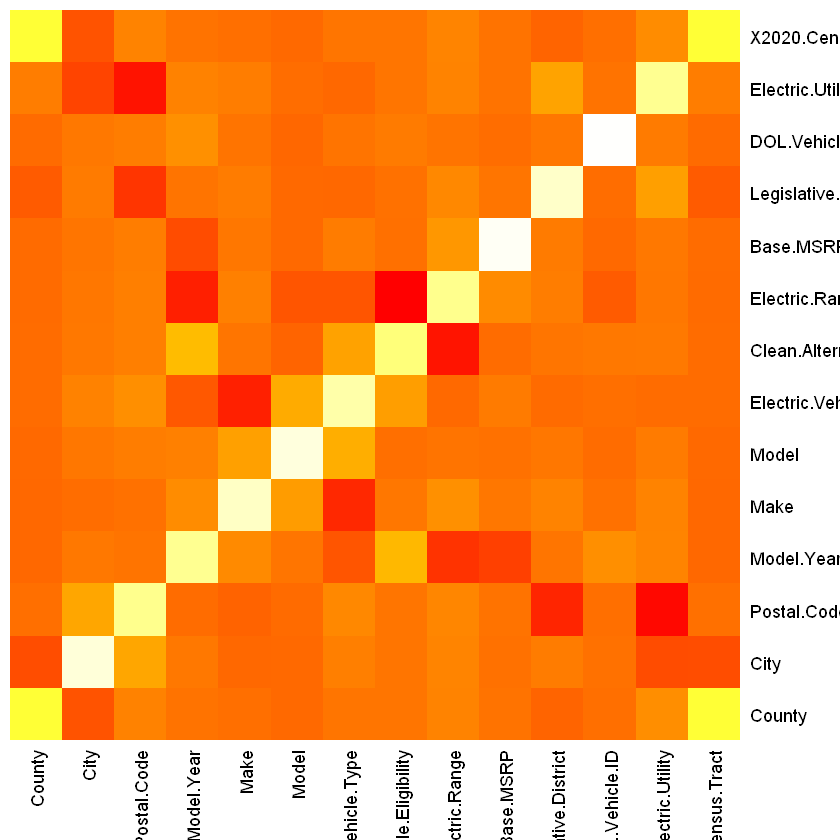

In [19]:
# Calculate the correlation matrix for between variables
numeric_vars <- Electric_vehicles_clean[, sapply(Electric_vehicles_clean, is.numeric)]
cor_matrix <- cor(numeric_vars)

# Visualize the correlation matrix using a heatmap
heatmap(cor_matrix, Rowv=NA, Colv=NA, col = heat.colors(256), scale="column", margins=c(5,5))

In [20]:
# Calculate the correlation of all predictors with the target variable'churn'
correlations <- cor(Electric_vehicles_clean[, sapply(Electric_vehicles_clean, is.numeric)])
correlation_with_target <- abs(correlations[,'Electric.Vehicle.Type'])

# Sort features by their correlation with 'churn'
sorted_features <- sort(correlation_with_target, decreasing = TRUE)

# Display the sorted features
sorted_features


Electric.Vehicle.Type 
                               1.000000000 
                                      Make 
                               0.396727872 
                                     Model 
                               0.287365475 
Clean.Alternative.Fuel.Vehicle.Eligibility 
                               0.225689988 
                                Model.Year 
                               0.165022749 
                            Electric.Range 
                               0.160401245 
                               Postal.Code 
                               0.097035172 
                      Legislative.District 
                               0.069039149 
                          Electric.Utility 
                               0.067449322 
                                      City 
                               0.045840545 
                                 Base.MSRP 
                               0.035472781 
                            DOL.Vehicle.ID 
                               0.008106387 
                        X2020.Census.Tract 
                               0.003853469 
                                    County 
                               0.003359047

In [21]:
# Define a threshold for low correlation
threshold <- 0.1

# Identify features that have a correlation higher than the threshold
features_to_keep <- names(correlation_with_target[correlation_with_target > threshold])
features_to_keep

[1] "Model.Year"                                
[2] "Make"                                      
[3] "Model"                                     
[4] "Electric.Vehicle.Type"                     
[5] "Clean.Alternative.Fuel.Vehicle.Eligibility"
[6] "Electric.Range"

In [22]:
# Subset the data to keep only the features with high enough correlation
Electric_vehicles_sorted <- Electric_vehicles_clean[, features_to_keep]

# Display the dataset with low-correlation features removed
head(Electric_vehicles_sorted)

,Model.Year,Make,Model,Electric.Vehicle.Type,Clean.Alternative.Fuel.Vehicle.Eligibility,Electric.Range
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,2020,35,82,1,1,291
2,2023,35,82,1,2,0
3,2019,35,80,1,1,270
4,2016,35,80,1,1,210
5,2021,35,82,1,2,0
6,2017,12,52,2,3,21


In [23]:
# Normalization
# Remove Electric Vehicle Type column from the dataset so it doesn't get normalized
library(caret)
sdataset <- subset(Electric_vehicles_sorted,  select = -c(Electric.Vehicle.Type) )


In [24]:
head(sdataset)

,Model.Year,Make,Model,Clean.Alternative.Fuel.Vehicle.Eligibility,Electric.Range
,<int>,<dbl>,<dbl>,<dbl>,<int>
1,2020,35,82,1,291
2,2023,35,82,2,0
3,2019,35,80,1,270
4,2016,35,80,1,210
5,2021,35,82,2,0
6,2017,12,52,3,21


In [25]:
# `preProcess` function can scale and center (standardize) the data
preprocessor <- preProcess(sdataset, method = c("center", "scale"))
Electric_vehicles_normalized <- predict(preprocessor, sdataset)

In [26]:
head(Electric_vehicles_normalized)

,Model.Year,Make,Model,Clean.Alternative.Fuel.Vehicle.Eligibility,Electric.Range
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.1729901,0.7326564,0.14146508,-1.1460753,2.5243852
2,0.8306308,0.7326564,0.14146508,0.4086174,-0.6395993
3,-0.5075304,0.7326564,0.06929173,-1.1460753,2.2960565
4,-1.5111513,0.7326564,0.06929173,-1.1460753,1.6436885
5,0.1615502,0.7326564,0.14146508,0.4086174,-0.6395993
6,-1.1766110,-1.2552871,-0.94113514,1.9633102,-0.4112705


In [27]:
summary(Electric_vehicles_normalized)

   Model.Year           Make             Model         
 Min.   :-7.8674   Min.   :-2.2060   Min.   :-2.78156  
 1st Qu.:-0.5075   1st Qu.:-0.8231   1st Qu.:-0.03897  
 Median : 0.4961   Median : 0.7327   Median : 0.06929  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.00000  
 3rd Qu.: 0.8306   3rd Qu.: 0.7327   3rd Qu.: 0.14147  
 Max.   : 1.1652   Max.   : 1.1648   Max.   : 2.19841  
 Clean.Alternative.Fuel.Vehicle.Eligibility Electric.Range   
 Min.   :-1.1461                            Min.   :-0.6396  
 1st Qu.:-1.1461                            1st Qu.:-0.6396  
 Median : 0.4086                            Median :-0.6396  
 Mean   : 0.0000                            Mean   : 0.0000  
 3rd Qu.: 0.4086                            3rd Qu.: 0.1759  
 Max.   : 1.9633                            Max.   : 3.0245  

In [28]:
# Add the Electric Vehicle Type column back to the dataset
Electric_vehicles_normalized$Electric.Vehicle.Type <- Electric_vehicles_sorted$Electric.Vehicle.Type

In [29]:
Electric_vehicles_normalized_summary<-table(Electric_vehicles_normalized$Electric.Vehicle.Type)
Electric_vehicles_normalized_summary


     1      2 
138948  38529 

In [30]:
head(Electric_vehicles_normalized)

,Model.Year,Make,Model,Clean.Alternative.Fuel.Vehicle.Eligibility,Electric.Range,Electric.Vehicle.Type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.1729901,0.7326564,0.14146508,-1.1460753,2.5243852,1
2,0.8306308,0.7326564,0.14146508,0.4086174,-0.6395993,1
3,-0.5075304,0.7326564,0.06929173,-1.1460753,2.2960565,1
4,-1.5111513,0.7326564,0.06929173,-1.1460753,1.6436885,1
5,0.1615502,0.7326564,0.14146508,0.4086174,-0.6395993,1
6,-1.1766110,-1.2552871,-0.94113514,1.9633102,-0.4112705,2


In [31]:
# Ensure 'Electric Vehicle Type' is a factor with two levels: 0 and 1
Electric_vehicles_normalized$Electric.Vehicle.Type <- factor(Electric_vehicles_sorted$Electric.Vehicle.Type)
#Electric_vehicles_normalized$Electric.Vehicle.Type <- factor(Electric_vehicles_sorted$Electric.Vehicle.Type, levels = c(0, 1))

In [32]:
str(Electric_vehicles_normalized)

'data.frame':	177477 obs. of  6 variables:
 $ Model.Year                                : num  -0.173 0.831 -0.508 -1.511 0.162 ...
 $ Make                                      : num  0.733 0.733 0.733 0.733 0.733 ...
 $ Model                                     : num  0.1415 0.1415 0.0693 0.0693 0.1415 ...
 $ Clean.Alternative.Fuel.Vehicle.Eligibility: num  -1.146 0.409 -1.146 -1.146 0.409 ...
 $ Electric.Range                            : num  2.52 -0.64 2.3 1.64 -0.64 ...
 $ Electric.Vehicle.Type                     : Factor w/ 2 levels "1","2": 1 1 1 1 1 2 1 2 1 2 ...


In [33]:
# Install ROSE package if not already installed
if (!require("ROSE")) {
    install.packages("ROSE", dependencies = TRUE)
    library(ROSE)
}

# Assuming your data frame is Electric_vehicles_clean and the target column is Electric.Vehicle.Type
# Perform oversampling and undersampling using ROSE
set.seed(256)  # For reproducibility
balanced_data <- ovun.sample(Electric.Vehicle.Type ~ ., data = Electric_vehicles_normalized, method = "both", N = nrow(Electric_vehicles_normalized), seed = 256)$data

# Print the value counts of the resampled 'Electric.Vehicle.Type'
table(balanced_data$Electric.Vehicle.Type)


Loading required package: ROSE

Loaded ROSE 0.0-4





    1     2 
89242 88235 

In [34]:
# Check for outliers using the IQR method
# Identify numeric columns
numeric_columns <- sapply(Electric_vehicles_normalized, is.numeric)

# Check for outliers using the IQR method
outliers <- sapply(Electric_vehicles_normalized[numeric_columns], function(x) {
  q75 <- quantile(x, 0.75, na.rm = TRUE)
  q25 <- quantile(x, 0.25, na.rm = TRUE)
  iqr <- q75 - q25
  sum(x < (q25 - 1.5 * iqr) | x > (q75 + 1.5 * iqr))
})
outliers

Model.Year 
                                      2448 
                                      Make 
                                         0 
                                     Model 
                                     71991 
Clean.Alternative.Fuel.Vehicle.Eligibility 
                                         0 
                            Electric.Range 
                                     32454

## MODEL BUILDING

In [35]:
#install.packages("xgboost")
#install.packages("caret")


# Load necessary libraries
library(caret)
library(xgboost)
library(pROC)

Installing package into 'C:/Users/lynne/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'xgboost' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'xgboost'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\lynne\AppData\Local\R\win-library\4.3\00LOCK\xgboost\libs\x64\xgboost.dll to C:\Users\lynne\AppData\Local\R\win-library\4.3\xgboost\libs\x64\xgboost.dll: Permission denied"
Warning message:
"restored 'xgboost'"



The downloaded binary packages are in
	C:\Users\lynne\AppData\Local\Temp\Rtmpk1rNc2\downloaded_packages


Warning message:
"package 'caret' is in use and will not be installed"

Attaching package: 'xgboost'


The following object is masked from 'package:dplyr':

    slice




In [54]:

# Set seed for reproducibility
set.seed(123)

# Split the data into training and testing sets
trainIndex <- createDataPartition(balanced_data$Electric.Vehicle.Type, p = 0.7, list = FALSE)
train_data <- balanced_data[trainIndex, ]
test_data <- balanced_data[-trainIndex, ]

In [55]:
# Convert all columns to numeric where necessary
balanced_data <- as.data.frame(lapply(balanced_data, function(col) {
  if (is.factor(col) || is.character(col)) {
    return(as.numeric(as.factor(col)))
  } else {
    return(col)
  }
}))

# Ensure class levels are valid R variable names
train_data$Electric.Vehicle.Type <- as.factor(make.names(train_data$Electric.Vehicle.Type))

# Convert the data to matrix format required by XGBoost
train_matrix <- as.matrix(train_data[, -which(names(train_data) == "Electric.Vehicle.Type")])
train_label <- as.numeric(train_data$Electric.Vehicle.Type) - 1  # XGBoost requires labels starting from 0

test_matrix <- as.matrix(test_data[, -which(names(test_data) == "Electric.Vehicle.Type")])
test_label <- as.numeric(test_data$Electric.Vehicle.Type) - 1  # XGBoost requires labels starting from 0

In [56]:
# Convert data to DMatrix format for XGBoost
dtrain <- xgb.DMatrix(data = train_matrix, label = train_label)
dtest <- xgb.DMatrix(data = test_matrix, label = test_label)

In [57]:

# Define parameters for XGBoost
params <- list(
  booster = "gbtree",
  objective = "binary:logistic",
  eval_metric = "auc",
  eta = 0.1,
  max_depth = 6,
  min_child_weight = 1,
  subsample = 0.8,
  colsample_bytree = 0.8
)


In [58]:
# Set up cross-validation
cv_control <- trainControl(
  method = "cv", 
  number = 10,
  summaryFunction = twoClassSummary,
  classProbs = TRUE,
  savePredictions = TRUE,
  verboseIter = TRUE
)


In [59]:
# Convert training data to data frame for caret
train_data_df <- as.data.frame(train_data)
train_data_df$Electric.Vehicle.Type <- as.factor(train_data_df$Electric.Vehicle.Type)

In [60]:
# Train the model with cross-validation using caret
set.seed(123)  # For reproducibility
xgb_model <- train(
  Electric.Vehicle.Type ~ .,
  data = train_data_df,
  method = "xgbTree",
  trControl = cv_control,
  tuneGrid = expand.grid(
    nrounds = 100,
    max_depth = 6,
    eta = 0.1,
    gamma = 0,
    colsample_bytree = 0.8,
    min_child_weight = 1,
    subsample = 0.8
  ),
  metric = "ROC"
)

+ Fold01: nrounds=100, max_depth=6, eta=0.1, gamma=0, colsample_bytree=0.8, min_child_weight=1, subsample=0.8 
- Fold01: nrounds=100, max_depth=6, eta=0.1, gamma=0, colsample_bytree=0.8, min_child_weight=1, subsample=0.8 
+ Fold02: nrounds=100, max_depth=6, eta=0.1, gamma=0, colsample_bytree=0.8, min_child_weight=1, subsample=0.8 
- Fold02: nrounds=100, max_depth=6, eta=0.1, gamma=0, colsample_bytree=0.8, min_child_weight=1, subsample=0.8 
+ Fold03: nrounds=100, max_depth=6, eta=0.1, gamma=0, colsample_bytree=0.8, min_child_weight=1, subsample=0.8 
- Fold03: nrounds=100, max_depth=6, eta=0.1, gamma=0, colsample_bytree=0.8, min_child_weight=1, subsample=0.8 
+ Fold04: nrounds=100, max_depth=6, eta=0.1, gamma=0, colsample_bytree=0.8, min_child_weight=1, subsample=0.8 
- Fold04: nrounds=100, max_depth=6, eta=0.1, gamma=0, colsample_bytree=0.8, min_child_weight=1, subsample=0.8 
+ Fold05: nrounds=100, max_depth=6, eta=0.1, gamma=0, colsample_bytree=0.8, min_child_weight=1, subsample=0.8 
-

In [61]:

# Evaluate the model on the test set
# Make predictions
pred_probs <- predict(xgb_model, newdata = test_data, type = "prob")[, 2]
pred_labels <- ifelse(pred_probs > 0.5, 1, 0)

# Confusion matrix
confusion_matrix <- table(Predicted = pred_labels, Actual = test_label)
print("Confusion Matrix:")
print(confusion_matrix)

# Calculate AUC
roc_curve <- roc(test_label, pred_probs)
auc_value <- auc(roc_curve)
print(paste("AUC:", auc_value))

# Create a confusion matrix object
confusion_matrix_obj <- confusionMatrix(as.factor(pred_labels), as.factor(test_label))

# Extract overall metrics
accuracy <- confusion_matrix_obj$overall['Accuracy']

# Extract class-specific metrics
precision <- confusion_matrix_obj$byClass['Pos Pred Value']  # 'Precision' in confusionMatrix
recall <- confusion_matrix_obj$byClass['Sensitivity']        # 'Recall' in confusionMatrix
f1 <- confusion_matrix_obj$byClass['F1']

# Create results list
XGBoost_results <- list(
  overall = list(
    Accuracy = accuracy
  ),
  byClass = list(
    Precision = precision,
    Recall = recall,
    F1 = f1
  )
)

# Print XGBoost metrics
print(paste("Accuracy:", accuracy))
print(paste("Precision:", precision))
print(paste("Recall:", recall))
print(paste("F1 Score:", f1))

[1] "Confusion Matrix:"
         Actual
Predicted     0     1
        0 26875     3
        1     2 26363


Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC: 0.999999926619899"
[1] "Accuracy: 0.999906090941532"
[1] "Precision: 0.999888384552422"
[1] "Recall: 0.999925586933065"
[1] "F1 Score: 0.999906985396707"


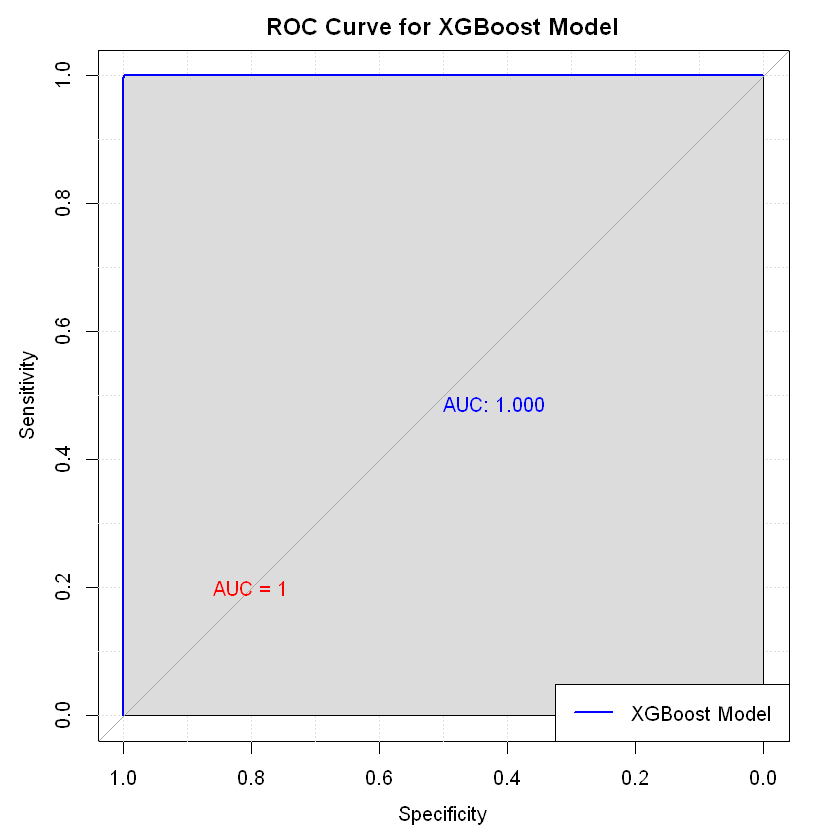

In [62]:
# Plot ROC curve
plot(roc_curve, main = "ROC Curve for XGBoost Model",
     col = "blue", lwd = 2,
     print.auc = TRUE, auc.polygon = TRUE,
     grid = TRUE)

# Add AUC value to the plot
text(0.8, 0.2, paste("AUC =", round(auc_value, 2)), col = "red")

# Add legend
legend("bottomright", legend = c("XGBoost Model"), col = c("blue"), lwd = 2)